# GMS Intro to Stats
## Excercise 2b: Dealing with uncertainty from raw experimental data
### Comparing gene expression of TNF, at different time points, for crispr-edited, cell lines.

#### Background on the data
+ Ankylosing Spondylitis is a chronic inflammatory disorder.
+ Through GWAS, the gene *TNFRSF1A* has been implicated in this disease.
+ Would like to understand the regulatory elements around this gene.
+ Using CRISPR/Cas9 to delete putative enhancers and then measured TNF expression at different time points using qPCR in the resulting cell lines.


In [1]:
# Import the packages we need
# Manipulate the data
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import metrics
# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Get the data in
rep1 = pd.read_csv('TNF time point Rep 1 summary.csv', index_col=[0,1])
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
Cell Line            LPS Time point                                     
Intron enh A1       unstimulated        23.47     23.62         16.59   
                    2 hr                19.34     19.43         16.25   
                    6 hr                18.89     19.24         16.16   
                    24 hr               18.15     18.32         15.21   
                    48 hr               21.69     20.42         14.65   
Intron enh B6       unstimulated        23.21     23.82         16.07   
                    2 hr                25.29     20.46         16.13   
                    6 hr                19.38     19.42           NaN   
                    24 hr               20.05     19.99         15.14   
                    48 hr               21.96     21.72         14.96   
Intron enh F7       unstimulated        25.38     25.26         17.52   
                    2 hr                21.57     21.48         16.97   
                    6 hr                21.03     20.76         16.45   
                    24 hr               30.78     30.57           NaN   
                    48 hr               21.39     21.30         15.25   
Intergenic enh C8.3 unstimulated        24.43     24.11         16.23   
                    2 hr                20.46     20.59         16.30   
                    6 hr                19.87     19.41         16.01   
                    24 hr               19.23     19.10         16.72   
                    48 hr               22.14     21.91         15.74   

                                     b-actin Cq 2  
Cell Line            LPS Time point                
Intron enh A1       unstimulated            16.52  
                    2 hr                    16.21  
                    6 hr                    16.05  
                    24 hr                   15.20  
                    48 hr                   14.41  
Intron enh B6       unstimulated            15.77  
                    2 hr                    15.95  
                    6 hr                    15.21  
                    24 hr                   15.16  
                    48 hr                   14.77  
Intron enh F7       unstimulated            17.68  
                    2 hr                    17.66  
                    6 hr                    16.36  
                    24 hr                   22.77  
                    48 hr                   15.51  
Intergenic enh C8.3 unstimulated            16.49  
                    2 hr                    16.15  
                    6 hr                    15.96  
                    24 hr                   16.62  
                    48 hr                   15.68

In [3]:
# Let's find the mean between the two CQ
rep1['TNF_mean'] = rep1[['TNF Cq 1', 'TNF Cq 2']].mean(axis=1)
rep1['b-actin_mean'] = rep1[['b-actin Cq 1', 'b-actin Cq 2']].mean(axis=1)
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
Cell Line            LPS Time point                                     
Intron enh A1       unstimulated        23.47     23.62         16.59   
                    2 hr                19.34     19.43         16.25   
                    6 hr                18.89     19.24         16.16   
                    24 hr               18.15     18.32         15.21   
                    48 hr               21.69     20.42         14.65   
Intron enh B6       unstimulated        23.21     23.82         16.07   
                    2 hr                25.29     20.46         16.13   
                    6 hr                19.38     19.42           NaN   
                    24 hr               20.05     19.99         15.14   
                    48 hr               21.96     21.72         14.96   
Intron enh F7       unstimulated        25.38     25.26         17.52   
                    2 hr                21.57     21.48         16.97   
                    6 hr                21.03     20.76         16.45   
                    24 hr               30.78     30.57           NaN   
                    48 hr               21.39     21.30         15.25   
Intergenic enh C8.3 unstimulated        24.43     24.11         16.23   
                    2 hr                20.46     20.59         16.30   
                    6 hr                19.87     19.41         16.01   
                    24 hr               19.23     19.10         16.72   
                    48 hr               22.14     21.91         15.74   

                                     b-actin Cq 2  TNF_mean  b-actin_mean  
Cell Line            LPS Time point                                        
Intron enh A1       unstimulated            16.52    23.545        16.555  
                    2 hr                    16.21    19.385        16.230  
                    6 hr                    16.05    19.065        16.105  
                    24 hr                   15.20    18.235        15.205  
                    48 hr                   14.41    21.055        14.530  
Intron enh B6       unstimulated            15.77    23.515        15.920  
                    2 hr                    15.95    22.875        16.040  
                    6 hr                    15.21    19.400        15.210  
                    24 hr                   15.16    20.020        15.150  
                    48 hr                   14.77    21.840        14.865  
Intron enh F7       unstimulated            17.68    25.320        17.600  
                    2 hr                    17.66    21.525        17.315  
                    6 hr                    16.36    20.895        16.405  
                    24 hr                   22.77    30.675        22.770  
                    48 hr                   15.51    21.345        15.380  
Intergenic enh C8.3 unstimulated            16.49    24.270        16.360  
                    2 hr                    16.15    20.525        16.225  
                    6 hr                    15.96    19.640        15.985  
                    24 hr                   16.62    19.165        16.670  
                    48 hr                   15.68    22.025        15.710

In [4]:
# Take away the house keeper gene's expression
rep1['DCT'] = rep1['TNF_mean'] - rep1['b-actin_mean']
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
Cell Line            LPS Time point                                     
Intron enh A1       unstimulated        23.47     23.62         16.59   
                    2 hr                19.34     19.43         16.25   
                    6 hr                18.89     19.24         16.16   
                    24 hr               18.15     18.32         15.21   
                    48 hr               21.69     20.42         14.65   
Intron enh B6       unstimulated        23.21     23.82         16.07   
                    2 hr                25.29     20.46         16.13   
                    6 hr                19.38     19.42           NaN   
                    24 hr               20.05     19.99         15.14   
                    48 hr               21.96     21.72         14.96   
Intron enh F7       unstimulated        25.38     25.26         17.52   
                    2 hr                21.57     21.48         16.97   
                    6 hr                21.03     20.76         16.45   
                    24 hr               30.78     30.57           NaN   
                    48 hr               21.39     21.30         15.25   
Intergenic enh C8.3 unstimulated        24.43     24.11         16.23   
                    2 hr                20.46     20.59         16.30   
                    6 hr                19.87     19.41         16.01   
                    24 hr               19.23     19.10         16.72   
                    48 hr               22.14     21.91         15.74   

                                     b-actin Cq 2  TNF_mean  b-actin_mean  \
Cell Line            LPS Time point                                         
Intron enh A1       unstimulated            16.52    23.545        16.555   
                    2 hr                    16.21    19.385        16.230   
                    6 hr                    16.05    19.065        16.105   
                    24 hr                   15.20    18.235        15.205   
                    48 hr                   14.41    21.055        14.530   
Intron enh B6       unstimulated            15.77    23.515        15.920   
                    2 hr                    15.95    22.875        16.040   
                    6 hr                    15.21    19.400        15.210   
                    24 hr                   15.16    20.020        15.150   
                    48 hr                   14.77    21.840        14.865   
Intron enh F7       unstimulated            17.68    25.320        17.600   
                    2 hr                    17.66    21.525        17.315   
                    6 hr                    16.36    20.895        16.405   
                    24 hr                   22.77    30.675        22.770   
                    48 hr                   15.51    21.345        15.380   
Intergenic enh C8.3 unstimulated            16.49    24.270        16.360   
                    2 hr                    16.15    20.525        16.225   
                    6 hr                    15.96    19.640        15.985   
                    24 hr                   16.62    19.165        16.670   
                    48 hr                   15.68    22.025        15.710   

                                       DCT  
Cell Line            LPS Time point         
Intron enh A1       unstimulated     6.990  
                    2 hr             3.155  
                    6 hr             2.960  
                    24 hr            3.030  
                    48 hr            6.525  
Intron enh B6       unstimulated     7.595  
                    2 hr             6.835  
                    6 hr             4.190  
                    24 hr            4.870  
                    48 hr            6.975  
Intron enh F7       unstimulated     7.720  
                    2 hr             4.210  
                    6 hr             4.490  
                    24 hr            7.905  
               

In [5]:
# Take away the unstimulated cell lines' expression
ddct = []
unstimulated_value = 0
for i in rep1.index.values:
    if 'unstimulated' in i:
        unstimulated_value = rep1['DCT'].loc[i]
    ddct.append(rep1['DCT'].loc[i] - unstimulated_value)
rep1['DDCT'] = ddct
rep1['ExDDCT_rep1'] = 2**-rep1['DDCT']
rep1

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
Cell Line            LPS Time point                                     
Intron enh A1       unstimulated        23.47     23.62         16.59   
                    2 hr                19.34     19.43         16.25   
                    6 hr                18.89     19.24         16.16   
                    24 hr               18.15     18.32         15.21   
                    48 hr               21.69     20.42         14.65   
Intron enh B6       unstimulated        23.21     23.82         16.07   
                    2 hr                25.29     20.46         16.13   
                    6 hr                19.38     19.42           NaN   
                    24 hr               20.05     19.99         15.14   
                    48 hr               21.96     21.72         14.96   
Intron enh F7       unstimulated        25.38     25.26         17.52   
                    2 hr                21.57     21.48         16.97   
                    6 hr                21.03     20.76         16.45   
                    24 hr               30.78     30.57           NaN   
                    48 hr               21.39     21.30         15.25   
Intergenic enh C8.3 unstimulated        24.43     24.11         16.23   
                    2 hr                20.46     20.59         16.30   
                    6 hr                19.87     19.41         16.01   
                    24 hr               19.23     19.10         16.72   
                    48 hr               22.14     21.91         15.74   

                                     b-actin Cq 2  TNF_mean  b-actin_mean  \
Cell Line            LPS Time point                                         
Intron enh A1       unstimulated            16.52    23.545        16.555   
                    2 hr                    16.21    19.385        16.230   
                    6 hr                    16.05    19.065        16.105   
                    24 hr                   15.20    18.235        15.205   
                    48 hr                   14.41    21.055        14.530   
Intron enh B6       unstimulated            15.77    23.515        15.920   
                    2 hr                    15.95    22.875        16.040   
                    6 hr                    15.21    19.400        15.210   
                    24 hr                   15.16    20.020        15.150   
                    48 hr                   14.77    21.840        14.865   
Intron enh F7       unstimulated            17.68    25.320        17.600   
                    2 hr                    17.66    21.525        17.315   
                    6 hr                    16.36    20.895        16.405   
                    24 hr                   22.77    30.675        22.770   
                    48 hr                   15.51    21.345        15.380   
Intergenic enh C8.3 unstimulated            16.49    24.270        16.360   
                    2 hr                    16.15    20.525        16.225   
                    6 hr                    15.96    19.640        15.985   
                    24 hr                   16.62    19.165        16.670   
                    48 hr                   15.68    22.025        15.710   

                                       DCT   DDCT  ExDDCT_rep1  
Cell Line            LPS Time point                             
Intron enh A1       unstimulated     6.990  0.000     1.000000  
                    2 hr             3.155 -3.835    14.270856  
                    6 hr             2.960 -4.030    16.336194  
                    24 hr            3.030 -3.960    15.562479  
                    48 hr            6.525 -0.465     1.380317  
Intron enh B6       unstimulated     7.595  0.000     1.000000  
                    2 hr             6.835 -0.760     1.693491  
                    6 hr             4.190 -3.405    10.592711  
                    24 hr            4.870 -2.725     6.611603  
                    

In [6]:
# Repeat for 2nd replicate
rep2 = pd.read_csv('TNF time point Rep 2 summary.csv', index_col=[0,1])
rep2['TNF_average'] = rep2[['TNF Cq 1', 'TNF Cq 2']].mean(axis=1)
rep2['b-actin_average'] = rep2[['b-actin Cq 1', 'b-actin Cq 2']].mean(axis=1)
rep2['DCT'] = rep2['TNF_average'] - rep2['b-actin_average']
ddct = []
unstimulated_value = 0
for i in rep2.index.values:
    if 'unstimulated' in i:
        unstimulated_value = rep2['DCT'].loc[i]
    ddct.append(rep2['DCT'].loc[i] - unstimulated_value)
rep2['DDCT'] = ddct
rep2['ExDDCT_rep2'] = 2**-rep2['DDCT']
rep2

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
Cell Line            LPS Time point                                     
Intron enh A1       unstimulated        24.49     24.53         15.51   
                    2 hr                18.92     18.58         16.02   
                    6 hr                20.11     20.03         16.31   
                    24 hr               21.87     21.22         15.19   
                    48 hr               21.72     21.55         14.35   
Intron enh B6       unstimulated        26.24     26.10         16.45   
                    2 hr                20.44     20.30         16.64   
                    6 hr                21.85     21.91         17.34   
                    24 hr               22.40     22.28         16.21   
                    48 hr               24.01     23.88         15.71   
Intron enh F7       unstimulated        25.47     25.70         16.42   
                    2 hr                20.20     20.39         17.14   
                    6 hr                21.47     21.94         17.95   
                    24 hr               22.47     22.52         17.32   
                    48 hr               24.96     24.83         16.31   
Intergenic enh C8.3 unstimulated        24.83     26.23         16.17   
                    2 hr                19.70     20.01         16.26   
                    6 hr                20.06     20.22         16.45   
                    24 hr               20.47     20.60         15.74   
                    48 hr               22.65     22.81         15.49   

                                     b-actin Cq 2  TNF_average  \
Cell Line            LPS Time point                              
Intron enh A1       unstimulated            15.37       24.510   
                    2 hr                    15.87       18.750   
                    6 hr                    16.17       20.070   
                    24 hr                   15.02       21.545   
                    48 hr                   14.09       21.635   
Intron enh B6       unstimulated            16.30       26.170   
                    2 hr                    16.31       20.370   
                    6 hr                    16.92       21.880   
                    24 hr                   15.91       22.340   
                    48 hr                   15.56       23.945   
Intron enh F7       unstimulated            16.51       25.585   
                    2 hr                    17.21       20.295   
                    6 hr                    18.05       21.705   
                    24 hr                   17.08       22.495   
                    48 hr                   16.26       24.895   
Intergenic enh C8.3 unstimulated            16.08       25.530   
                    2 hr                    16.14       19.855   
                    6 hr                    16.21       20.140   
                    24 hr                   15.67       20.535   
                    48 hr                   15.25       22.730   

                                     b-actin_average    DCT   DDCT  \
Cell Line            LPS Time point                                  
Intron enh A1       unstimulated              15.440  9.070  0.000   
                    2 hr                      15.945  2.805 -6.265   
                    6 hr                      16.240  3.830 -5.240   
                    24 hr                     15.105  6.440 -2.630   
                    48 hr                     14.220  7.415 -1.655   
Intron enh B6       unstimulated              16.375  9.795  0.000   
                    2 hr                      16.475  3.895 -5.900   
                    6 hr                      17.130  4.750 -5.045   
                    24 hr                     16.060  6.280 -3.515   
                    48 hr                     15.635  8.310 -1.485   
Intron enh F7       unstimulated              16.465  9.120  0.000   
                    2 hr                      17.175  3.120 -6.000 

In [7]:
# Repeat 3rd replicate
rep3 = pd.read_csv('TNF time point Rep 3 summary.csv', index_col=[0,1])
rep3['TNF_average'] = rep3[['TNF Cq 1', 'TNF Cq 2']].mean(axis=1)
rep3['b-actin_average'] = rep3[['b-actin Cq 1', 'b-actin Cq 2']].mean(axis=1)
rep3['DCT'] = rep3['TNF_average'] - rep3['b-actin_average']
ddct = []
unstimulated_value = 0
for i in rep3.index.values:
    if 'unstimulated' in i:
        unstimulated_value = rep3['DCT'].loc[i]
    ddct.append(rep3['DCT'].loc[i] - unstimulated_value)
rep3['DDCT'] = ddct
rep3['ExDDCT_rep3'] = 2**-rep3['DDCT']
rep3

TNF Cq 1  TNF Cq 2  b-actin Cq 1  \
Cell Line            LPS Time point                                     
Intron enh A1       unstimulated        24.43     24.43         16.12   
                    2 hr                18.67     18.60         16.16   
                    6 hr                19.35     19.21         15.14   
                    24 hr               19.39     19.27         16.56   
                    48 hr               27.48     26.93         15.79   
Intron enh B6       unstimulated        27.47     27.32         20.18   
                    2 hr                20.92     21.05         18.53   
                    6 hr                21.79     21.84         18.44   
                    24 hr               21.81     21.72         17.53   
                    48 hr               24.79     24.70         17.12   
Intron enh F7       unstimulated        26.02     26.01         17.29   
                    2 hr                19.32     19.53         16.91   
                    6 hr                20.27     20.41         16.77   
                    24 hr               22.02     22.09         17.47   
                    48 hr               23.27     23.41         14.96   
Intergenic enh C8.3 unstimulated        25.11     25.06         15.99   
                    2 hr                19.70     19.80         15.57   
                    6 hr                20.27     20.34         15.84   
                    24 hr               20.03     20.00         14.76   
                    48 hr               24.38     24.28         15.58   

                                     b-actin Cq 2  TNF_average  \
Cell Line            LPS Time point                              
Intron enh A1       unstimulated            15.88       24.430   
                    2 hr                    15.89       18.635   
                    6 hr                    14.35       19.280   
                    24 hr                   13.70       19.330   
                    48 hr                   15.72       27.205   
Intron enh B6       unstimulated            18.53       27.395   
                    2 hr                    18.20       20.985   
                    6 hr                    18.06       21.815   
                    24 hr                   17.37       21.765   
                    48 hr                   16.88       24.745   
Intron enh F7       unstimulated            17.47       26.015   
                    2 hr                    17.05       19.425   
                    6 hr                    16.81       20.340   
                    24 hr                   17.16       22.055   
                    48 hr                   15.27       23.340   
Intergenic enh C8.3 unstimulated            16.00       25.085   
                    2 hr                    15.32       19.750   
                    6 hr                    15.80       20.305   
                    24 hr                   14.74       20.015   
                    48 hr                   15.47       24.330   

                                     b-actin_average     DCT   DDCT  \
Cell Line            LPS Time point                                   
Intron enh A1       unstimulated              16.000   8.430  0.000   
                    2 hr                      16.025   2.610 -5.820   
                    6 hr                      14.745   4.535 -3.895   
                    24 hr                     15.130   4.200 -4.230   
                    48 hr                     15.755  11.450  3.020   
Intron enh B6       unstimulated              19.355   8.040  0.000   
                    2 hr                      18.365   2.620 -5.420   
                    6 hr                      18.250   3.565 -4.475   
                    24 hr                     17.450   4.315 -3.725   
                    48 hr                     17.000   7.745 -0.295   
Intron enh F7       unstimulated              17.380   8.635  0.000   
                    2 hr                      16.980  

In [8]:
# Lets collect the data together
all_reps = pd.concat([rep1['ExDDCT_rep1'],rep2['ExDDCT_rep2'],rep3['ExDDCT_rep3']],axis=1)
all_reps

ExDDCT_rep1  ExDDCT_rep2  ExDDCT_rep3
Cell Line            LPS Time point                                       
Intron enh A1       unstimulated        1.000000     1.000000     1.000000
                    2 hr               14.270856    76.904707    56.492992
                    6 hr               16.336194    37.791765    14.876879
                    24 hr              15.562479     6.190260    18.765359
                    48 hr               1.380317     3.149232     0.123279
Intron enh B6       unstimulated        1.000000     1.000000     1.000000
                    2 hr                1.693491    59.714111    42.813682
                    6 hr               10.592711    33.013862    22.238692
                    24 hr               6.611603    11.431953    13.223205
                    48 hr               1.536875     2.799172     1.226885
Intron enh F7       unstimulated        1.000000     1.000000     1.000000
                    2 hr               11.392402    64.000000    73.008878
                    6 hr                9.382680    42.665558    33.942008
                    24 hr               0.879649    14.172280    14.876879
                    48 hr               3.375263     1.424050     1.328686
Intergenic enh C8.3 unstimulated        1.000000     1.000000     1.000000
                    2 hr               12.210074    53.817371    27.569477
                    6 hr               19.093372    48.335123    24.335660
                    24 hr              42.665558    23.834839    14.172280
                    48 hr               3.020945     4.126733     1.218410

In [9]:
# Calculate what we need for error bars
all_reps['Mean'] = all_reps[['ExDDCT_rep1','ExDDCT_rep2','ExDDCT_rep3']].mean(axis=1)
all_reps['StDev'] = all_reps[['ExDDCT_rep1','ExDDCT_rep2','ExDDCT_rep3']].std(axis=1)
all_reps['StErr'] = all_reps['StDev'] / np.sqrt(3)
all_reps['CI_95'] = all_reps['StErr'] * 4.303
all_reps

ExDDCT_rep1  ExDDCT_rep2  ExDDCT_rep3  \
Cell Line            LPS Time point                                          
Intron enh A1       unstimulated        1.000000     1.000000     1.000000   
                    2 hr               14.270856    76.904707    56.492992   
                    6 hr               16.336194    37.791765    14.876879   
                    24 hr              15.562479     6.190260    18.765359   
                    48 hr               1.380317     3.149232     0.123279   
Intron enh B6       unstimulated        1.000000     1.000000     1.000000   
                    2 hr                1.693491    59.714111    42.813682   
                    6 hr               10.592711    33.013862    22.238692   
                    24 hr               6.611603    11.431953    13.223205   
                    48 hr               1.536875     2.799172     1.226885   
Intron enh F7       unstimulated        1.000000     1.000000     1.000000   
                    2 hr               11.392402    64.000000    73.008878   
                    6 hr                9.382680    42.665558    33.942008   
                    24 hr               0.879649    14.172280    14.876879   
                    48 hr               3.375263     1.424050     1.328686   
Intergenic enh C8.3 unstimulated        1.000000     1.000000     1.000000   
                    2 hr               12.210074    53.817371    27.569477   
                    6 hr               19.093372    48.335123    24.335660   
                    24 hr              42.665558    23.834839    14.172280   
                    48 hr               3.020945     4.126733     1.218410   

                                          Mean      StDev      StErr  \
Cell Line            LPS Time point                                    
Intron enh A1       unstimulated      1.000000   0.000000   0.000000   
                    2 hr             49.222852  31.943560  18.442623   
                    6 hr             23.001613  12.829414   7.407065   
                    24 hr            13.506033   6.534907   3.772930   
                    48 hr             1.550943   1.520175   0.877674   
Intron enh B6       unstimulated      1.000000   0.000000   0.000000   
                    2 hr             34.740428  29.840931  17.228670   
                    6 hr             21.948422  11.213393   6.474056   
                    24 hr            10.422254   3.419494   1.974246   
                    48 hr             1.854311   0.832824   0.480831   
Intron enh F7       unstimulated      1.000000   0.000000   0.000000   
                    2 hr             49.467093  33.279897  19.214158   
                    6 hr             28.663415  17.257901   9.963854   
                    24 hr             9.976269   7.885778   4.552856   
                    48 hr             2.042666   1.155047   0.666867   
Intergenic enh C8.3 unstimulated      1.000000   0.000000   0.000000   
                    2 hr             31.198974  21.039765  12.147314   
                    6 hr             30.588052  15.591321   9.001654   
                    24 hr            26.890892  14.490387   8.366029   
                    48 hr             2.788696   1.468005   0.847553   

                                         CI_95  
Cell Line            LPS Time point             
Intron enh A1       unstimulated      0.000000  
                    2 hr             79.358606  
                    6 hr             31.872603  
                    24 hr            16.234919  
                    48 hr             3.776629  
Intron enh B6       unstimulated      0.000000  
                    2 hr             74.134966  
                    6 hr             27.857861  
                    24 hr             8.495181  
                    48 hr             2.069016  
Intron enh F7       unstimulated      0.000000  
                    2 hr             82.678521  
                    6 hr             42.874463  


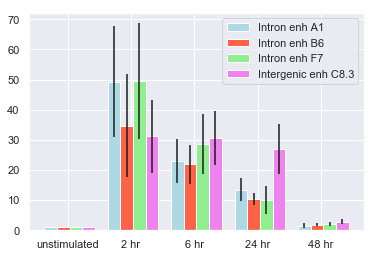

In [10]:
# Lets plot them!
fig, ax = plt.subplots()
cell_lines = {'Intron enh A1':'lightblue', 
              'Intron enh B6':'tomato', 
              'Intron enh F7':'lightgreen', 
              'Intergenic enh C8.3':'violet'}

w = 0.2
ind = np.arange(len(all_reps.loc['Intron enh A1'].index))
for c,cell_line in enumerate(cell_lines):
    ax.bar(ind + ((c-1.33)*w), 
            all_reps['Mean'].loc[cell_line].values,
            width = w,
            yerr=all_reps['StErr'].loc[cell_line].values,
            align='center',
            color=cell_lines[cell_line], 
            label=cell_line)


plt.xticks(ind, all_reps.loc['Intron enh A1'].index.values)
plt.legend(loc='upper right')

### Can we find a link between time and TNF expression for each cell line?
#### Using Linear Regression to predict TNF expression for a given time.

In this case:
y = b<sub>0</sub> + b<sub>1</sub>x + e

+ where *y* is the TNF dose,
+ *x* is the time point,
+ we are trying to find the intercept *b<sub>0</sub>*
+ and the slope *b<sub>1</sub>*
+ with an unobserved random error *e*

In [11]:
timepoints = np.array([2,6,24,48])
for cell_line in cell_lines:
    tnf_exp = list(all_reps.Mean.loc[cell_line].values)[1:]
    print(cell_line)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(timepoints, tnf_exp)
    print("slope: %f    intercept: %f" % (slope, intercept))
    print("R-squared: %f" % r_value**2)
    print('\n')

Intron enh A1
slope: -0.841351    intercept: 38.647381
R-squared: 0.758268


Intron enh B6
slope: -0.635603    intercept: 29.953412
R-squared: 0.871873


Intron enh F7
slope: -0.904997    intercept: 40.637297
R-squared: 0.806462


Intergenic enh C8.3
slope: -0.609218    intercept: 35.051005
R-squared: 0.893404




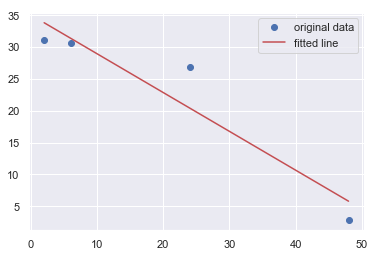

In [12]:
# What does the result look like for Intergenic enh C8.3
plt.plot(timepoints, tnf_exp, 'o', label='original data')
plt.plot(timepoints, intercept + slope*timepoints, 'r', label='fitted line')
plt.legend()
plt.show()

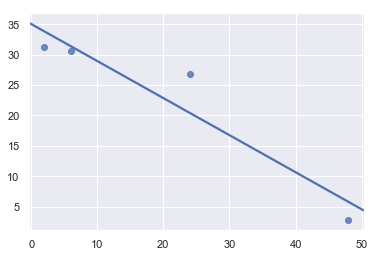

In [13]:
sns.regplot(timepoints, tnf_exp, ci=None)

#### Change to polynomial regression?

So for a second order regression:
y = b<sub>0</sub> + b<sub>1</sub>x + b<sub>2</sub>x<sup>2</sup> + e


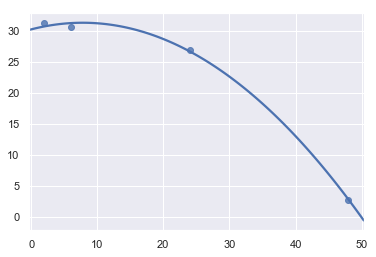

In [14]:
sns.regplot(timepoints, tnf_exp, ci=None, order=2)

/Users/jpw/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


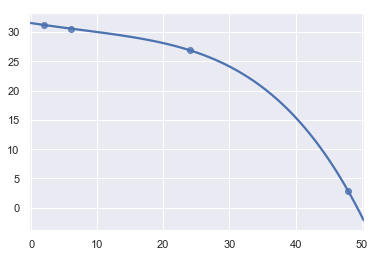

In [15]:
# Overfit?
sns.regplot(timepoints, tnf_exp, ci=None, order=4)